# scikit-learn 之 KNN 分类

neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n-jobs=1)

n_neighbors 就是 kNN 里的 k，就是在做分类时，我们选取问题点最近的多少个最近邻。

    weights 是在进行分类判断时给最近邻附上的加权，默认的 'uniform' 是等权加权，还有 'distance' 选项是按照距离的倒数进行加权，也可以使用用户自己设置的其他加权方法。举个例子：假如距离询问点最近的三个数据点中，有 1 个 A 类和 2 个 B 类，并且假设 A 类离询问点非常近，而两个 B 类距离则稍远。在等权加权中，KNN 会判断问题点为 B 类；而如果使用距离加权，那么 A 类有更高的权重（因为更近），如果它的权重高于两个 B 类的权重的总和，那么算法会判断问题点为 A 类。权重功能的选项应该视应用的场景而定。

    algorithm 是分类时采取的算法，有 'brute'、'kd_tree' 和 'ball_tree'。kd_tree 的算法在 kd 树文章中有详细介绍，而 ball_tree 是另一种基于树状结构的 kNN 算法，brute 则是最直接的蛮力计算。根据样本量的大小和特征的维度数量，不同的算法有各自的优势。默认的 'auto' 选项会在学习时自动选择最合适的算法，所以一般来讲选择 auto 就可以。

    leaf_size 是 kd_tree 或 ball_tree 生成的树的树叶（树叶就是二叉树中没有分枝的节点）的大小。在 kd 树文章中我们所有的二叉树的叶子中都只有一个数据点，但实际上树叶中可以有多于一个的数据点，算法在达到叶子时在其中执行蛮力计算即可。对于很多使用场景来说，叶子的大小并不是很重要，我们设 leaf_size=1 就好。

    metric 和 p是距离函数的选项。一般来讲，默认的 metric='minkowski'（默认）和 p=2（默认）就可以满足大部分需求。其他的 metric 选项可见说明文档。

    metric_params 是一些特殊 metric 选项需要的特定参数，默认是 None。

    n_jobs 是并行计算的线程数量，默认是 1，输入 -1 则设为 CPU 的内核数。


在创建了一个 KNeighborsClassifier 类之后，我们需要给它数据来进行学习。这时需要使用 fit() 拟合功能。

neighbors.KNeighborsClassifier.fit(X,y)

在这里：

X 是一个 list 或 array 的数据，每一组数据可以是 tuple 也可以是 list 或者一维 array，但要注意所有数据的长度必须一样（等同于特征的数量）。当然，也可以把 X 理解为一个矩阵，其中每一横行是一个样本的特征数据。

y 是一个和 X 长度相同的 list 或 array，其中每个元素是 X 中相对应的数据的分类标签。

KNeighborsClassifier 类在对训练数据执行 fit() 后会根据原先 algorithm 的选项，依据训练数据生成一个 kd_tree 或者 ball_tree。如果输入是 algorithm='brute'，则什么都不做。这些信息都会被保存在一个类中，我们可以用它进行预测和计算。几个常用的功能有：

## k 最近邻

neighbors.KNeighborsClassifier.kneighbors(X=None, n_neighbors=None, return_distance= True)

这里 X 是一 list 或 array 的坐标，如果不提供，则默认输入训练时的样本数据。

n_neighbors 是指定搜寻最近的样本数据的数量，如果不提供，则以初始化 kNeighborsClassifier 时的 n_neighbors 为准。

return_distance 是是否输出距离，如果选择 False，那么功能的输出会只有 index 而没有 distance。


## 预测

neighbors.kNeighborsClassifier.predict(X)

也许是最常用的预测功能。输入 X 是一 list 或 array 的坐标，输出y是一个长度相同的 array，y[i] 是通过 KNN 分类对 X[i] 所预测的分类标签。

## 概率预测

neighbors.kNeighborsClassifier.predict_proba(X)

输入和上面的相同，输出 p 是是通过概率 KNN 判断 X[i] 属于第 j 类的概率。这里类别的排序是按照词典排序；举例来说，如果训练用的分类标签里有 (1,'1','a')三种，那么1就是第0类，'1' 是第1类，'a' 是第2类，因为在 Python 中 1<'1'<'a'。

## 正确率打分

neighbors.KNeighborsClassifier.score(X, y, sample_weight=None)

这是用来评估一次 KNN 学习的准确率的方法。很多可能会因为样本特征的选择不当或者 k 值得选择不当而出现过拟合或者偏差过大的问题。为了保证训练方法的准确性，一般我们会将已经带有分类标签的样本数据分成两组，一组进行学习，一组进行测试。这个 score() 就是在学习之后进行测试的功能。同 fit() 一样，这里的 X 是特征坐标，y 是样本的分类标签；sample_weight 是对样本的加权，长度等于 sample 的数量。返回的是正确率的百分比


## 具体实例

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

In [7]:
x1 = np.random.normal(50,6,200)
x2 = np.random.normal(30,6,200)
x3 = np.random.normal(45,6,200)
y1 = np.random.normal(5,0.5,200)
y2 = np.random.normal(4,0.5,200)
y3 = np.random.normal(2.5,0.5,200)

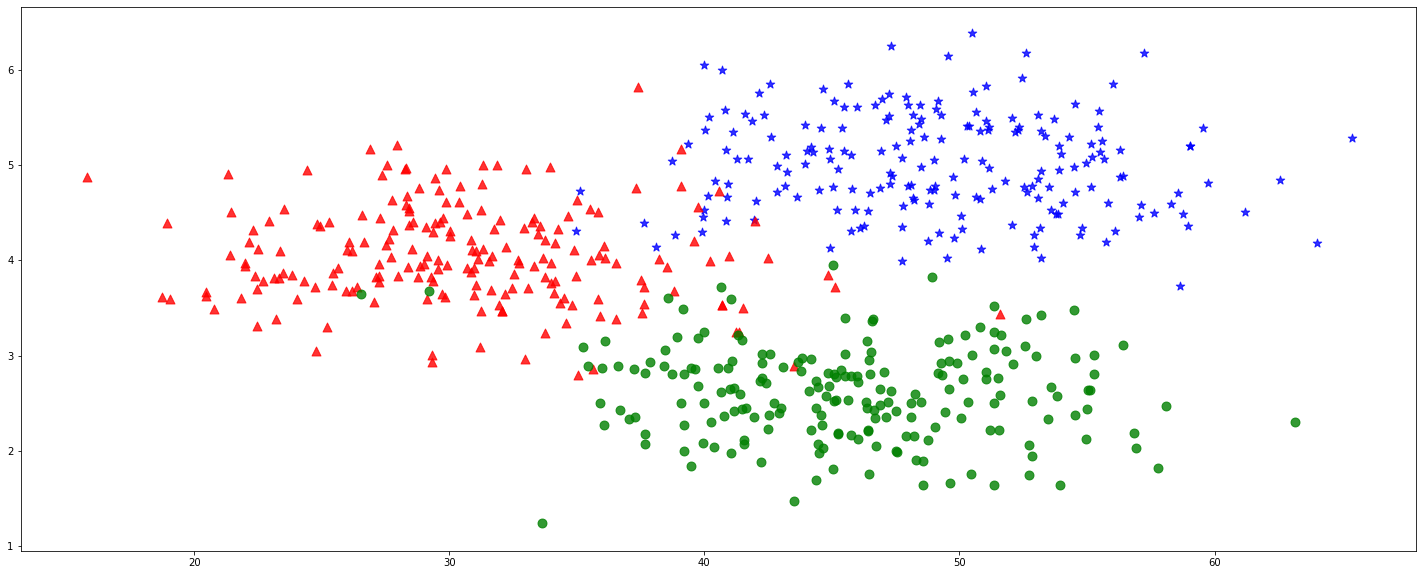

In [69]:
plt.figure(figsize=(25,10))

plt.scatter(x1,y1,c='b',marker='*',s=80,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=80, alpha=0.8)
plt.scatter(x3,y3, c='g', s=80, alpha=0.8)

In [22]:
x_val = np.concatenate((x1,x2,x3))
y_val = np.concatenate((y1,y2,y3))

In [24]:
x_diff = max(x_val)-min(x_val)
y_diff = max(y_val)-min(y_val)

In [40]:
x_normalized = [x/(x_diff) for x in x_val]
y_normalized = [y/(y_diff) for y in y_val]
xy_normalized = list(zip(x_normalized,y_normalized))

In [35]:
labels = [1]*200+[2]*200+[3]*200

In [36]:
clf = neighbors.KNeighborsClassifier(30)

In [43]:
clf.fit(xy_normalized, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

## k最近邻

###   (50,5) 和 (30,3) 两个点附近最近的 5 个样本分别都是什么。坐标别忘了除以 x_diff 和 y_diff 来归一化。

In [49]:
nearests = clf.kneighbors([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)], 5, False)
nearests

array([[110, 125, 194,  23, 107],
       [222, 207, 305, 234, 211]], dtype=int64)

也就是说训练数据中的第 110、125、194、23、107 的点离 (50,5) 最近，第 222、207、305、234、211 个点离 (30,3) 最近。

## 预测

还是上面那两个点，我们通过 30NN 来判断它们属于什么类别。

In [51]:
prediction = clf.predict([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction

array([1, 2])

也就是说 (50,5) 判断为 1 类，而 (30,3) 是 2 类。

## 概率预测

那么这两个点的分类的概率都是多少呢？

In [53]:
prediction_proba = clf.predict_proba([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction_proba

array([[1.        , 0.        , 0.        ],
       [0.        , 0.76666667, 0.23333333]])

告诉我们，(50, 5) 有 100% 的可能性是 1 类，而 (30,3) 有 76.7% 是 2 类，23.3% 是3类。

## 准确率打分

我们再用同样的均值和标准差生成一些正态分布点，以此检测预测的准确性。

In [60]:
x1_test = np.random.normal(50, 6, 100)
y1_test = np.random.normal(5, 0.5, 100)

x2_test = np.random.normal(30,6,100)
y2_test = np.random.normal(4,0.5,100)

x3_test = np.random.normal(45,6,100)
y3_test = np.random.normal(2.5, 0.5, 100)

xy_test_normalized = list(zip(np.concatenate((x1_test,x2_test,x3_test))/x_diff,\
                        np.concatenate((y1_test,y2_test,y3_test))/y_diff))

labels_test = [1]*100+[2]*100+[3]*100

测试数据生成完毕，下面进行测试

In [63]:
score = clf.score(xy_test_normalized, labels_test)
score

0.9466666666666667

得到预测的正确率是 94.67%。

再看一下，如果使用 1NN 分类，会出现过拟合的现象，那么准确率的平分就变为…

In [65]:
clf1 = neighbors.KNeighborsClassifier(1)
clf1.fit(xy_normalized, labels)
clf1.score(xy_test_normalized, labels_test)

0.9033333333333333

90.3%，的确是降低了。我们还应该注意，这里的预测准确率很高是因为训练和测试的数据都是人为按照正态分布生成的，
在实际使用的很多场景中（比如，涨跌预测）是很难达到这个精度的。